In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import os.path
from PIL import Image


In [2]:
def load_imgs(img_path):
    imgs=[]
    label=[]
    label1=os.listdir(img_path)
    for index in label1:
        label2 = os.listdir(img_path+'/' + index)
        for index2 in label2:
            c=0
            img=Image.open(img_path+'/' + index + '/' + index2).convert('RGB')
            img=img.resize(size=(64,64))
            #img=img.convert('L')
            img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img)) #.flatten())
            label.append(index)
            del img
    return np.array(imgs),label

In [3]:
X_train, y_train=load_imgs('/kaggle/input/vegetable-image-dataset/Vegetable Images/train')

In [4]:
X_test, y_test=load_imgs('/kaggle/input/vegetable-image-dataset/Vegetable Images/test')

In [5]:
X_val, y_val=load_imgs('/kaggle/input/vegetable-image-dataset/Vegetable Images/validation')

In [6]:
X_train.shape

(15000, 64, 64, 3)

In [7]:
#카테고리형 시리즈 만들고 레이블화
#훈련
X_train=np.array(X_train)
y_train=pd.Series(y_train,dtype='category')
#테스트
X_test=np.array(X_test)
y_test=pd.Series(y_test,dtype='category')
#검증
X_val=np.array(X_val)
y_val=pd.Series(y_val,dtype='category')
#범주화
y_train=y_train.cat.codes
y_test=y_test.cat.codes
y_val=y_val.cat.codes

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
#논문의 있는 VGGNET 구조
model = Sequential()
# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, strides= 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2,2), strides=2))

model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.summary()

2022-12-09 10:03:13.943561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 10:03:13.944571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 10:03:14.111714: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 10:03:14.112663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 10:03:14.113486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0

In [9]:
from tensorflow import keras

#성능 안오르면 멈춤
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
hist = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs=50, verbose=0
)

2022-12-09 10:03:18.543409: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 737280000 exceeds 10% of free system memory.
2022-12-09 10:03:19.465271: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 737280000 exceeds 10% of free system memory.
2022-12-09 10:03:20.087676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-09 10:03:22.616055: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [10]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 1s 15ms/step - loss: 0.2921 - accuracy: 0.9373


[0.29205799102783203, 0.937333345413208]

In [11]:
res = model.predict(X_test)


In [12]:
list_res = []
for i in range(len(res)):
    list_res.append(np.argmax(res[i]))

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
classification_report(y_test, list_res)

'              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       200\n           1       0.99      0.96      0.98       200\n           2       0.99      0.97      0.98       200\n           3       0.93      0.99      0.96       200\n           4       1.00      0.47      0.63       200\n           5       1.00      0.95      0.98       200\n           6       0.97      0.98      0.98       200\n           7       0.98      0.98      0.98       200\n           8       0.98      0.95      0.97       200\n           9       0.98      0.95      0.97       200\n          10       0.99      0.98      0.99       200\n          11       0.89      1.00      0.94       200\n          12       0.65      0.98      0.78       200\n          13       0.98      0.99      0.99       200\n          14       0.98      0.88      0.93       200\n\n    accuracy                           0.94      3000\n   macro avg       0.95      0.94      0.93      3000\nweigh

In [ ]:
'              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       200\n           1       0.99      0.96      0.98       200\n           2       0.99      0.97      0.98       200\n           3       0.93      0.99      0.96       200\n           4       1.00      0.47      0.63       200\n           5       1.00      0.95      0.98       200\n           6       0.97      0.98      0.98       200\n           7       0.98      0.98      0.98       200\n           8       0.98      0.95      0.97       200\n           9       0.98      0.95      0.97       200\n          10       0.99      0.98      0.99       200\n          11       0.89      1.00      0.94       200\n          12       0.65      0.98      0.78       200\n          13       0.98      0.99      0.99       200\n          14       0.98      0.88      0.93       200\n\n    accuracy                           0.94      3000\n   macro avg       0.95      0.94      0.93      3000\nweighted avg       0.95      0.94      0.93      3000\n'

In [14]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

[ 4  1  4 ... 11 11 11]


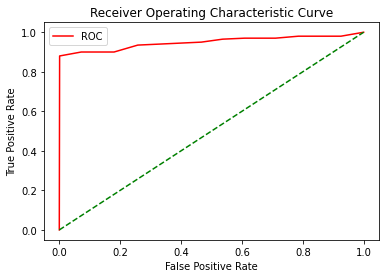

In [15]:
from sklearn.metrics import roc_curve


y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=-1)
print(y_pred)
fper, tper, thresholds = roc_curve(y_test, y_pred, pos_label=14)
plot_roc_curve(fper, tper)

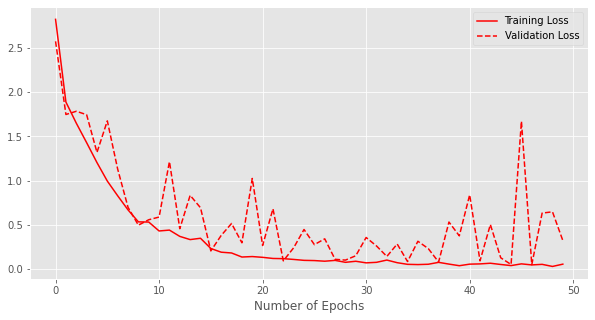

In [16]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

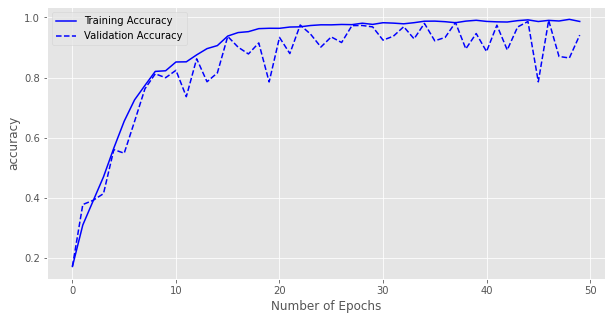

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show()